In [5]:
import numpy as np
import pandas as pd
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile



df= pd.read_excel("D:/Dataset/Wisconsin_breast_cancer.xlsx")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

In [6]:
df['diagnosis'] = np.where(df.diagnosis == 'M', 1, 0)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [60]:
y = df.diagnosis                          # M or B 
list = ['id', 'diagnosis']
       
x= df.drop(list,axis = 1 )
x.head()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Classification
from sklearn.model_selection import cross_val_score # Cross validation for training data
from sklearn.metrics import confusion_matrix # Confusion matrix for test data


sc = StandardScaler()
x_train = sc.fit_transform(x_train.astype(np.float64))
if(x_test.shape[0] != 0):
    x_test = sc.transform(x_test.astype(np.float64))

In [10]:
# Linear kernel SVM
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train, y_train)

# Applying k-Fold Cross Validation
print("Applying k fold cross validation ")
accuracies = cross_val_score(estimator=classifier,
                             X=x_train, y=y_train,
                             cv = 10, n_jobs=-1)
print("Cross validation accuracies :")
print(accuracies)
print("Cross validation mean :",accuracies.mean())
print("Cross validation std :",accuracies.std())

C:\Users\mkahs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Applying k fold cross validation 
Cross validation accuracies :
[0.975      0.975      0.95       0.95       0.975      1.
 1.         0.95       0.95       0.92105263]
Cross validation mean : 0.9646052631578946
Cross validation std : 0.023621627842700825


In [61]:
target = df.diagnosis                          # M or B 
list = ['id', 'diagnosis']
       
raw_data= df.drop(list,axis = 1 )

from sklearn.preprocessing import StandardScaler
conv = StandardScaler()
std_data = conv.fit_transform( x)

(569, 3)
The variance ratio for 3 components:  [44.27202561 18.97118204  9.39316326]
The variance for 3 components:  [13.30499079  5.7013746   2.82291016]
Final Matrix:  [[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]
the first 0 features could represent 76 percents of the viarance
Total variance:  0.0


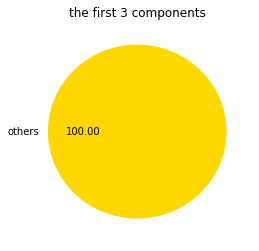

In [62]:
# use PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=3,svd_solver='full')
transformed_data = pca.fit_transform( std_data )
print( transformed_data.shape )
print( "The variance ratio for 3 components: ",pca.explained_variance_ratio_*100 )
print( "The variance for 3 components: ",pca.explained_variance_ )
print("Final Matrix: ",transformed_data)

threshold = 0.65
for_test = 0
order = 0
for index,ratio in  enumerate (pca.explained_variance_ratio_):
    if threshold>for_test:
        for_test+= ratio
    else:
        order = index + 1
        break
print( 'the first %d features could represent 76 percents of the viarance' % order )
print( "Total variance: ",pca.explained_variance_ratio_[:order].sum() )
com_col = [ 'com'+str(i+1) for i in range(order) ]
com_col.append('others')
com_value = [ i for i in pca.explained_variance_ratio_[:order] ]
com_value.append( 1-pca.explained_variance_ratio_[:order].sum() )
com_colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white']
plt.figure( figsize=[4,4] )
plt.pie( x=com_value,labels=com_col,colors=com_colors,autopct='%.2f' )
plt.title( 'the first 3 components' )
plt.show()

In [42]:
# to define the confusion_matrix and learning_curve
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix (  label,pred,classes = [0,1] ,cmap = plt.cm.Blues,title='confusion matrix' ):
    con_m = confusion_matrix( label,pred )
    plt.imshow( con_m,interpolation = 'nearest',cmap=cmap )
    plt.title(title)
    plt.colorbar()
    thres = con_m.max() / 2
    for j in range( con_m.shape[0] ):
        for i in range( con_m.shape[1] ):
            plt.text( i,j,con_m[j,i],
                      horizontalalignment = 'center',
                      color='white' if con_m[i,j]>thres else 'black')

    plt.ylabel( 'true label' )
    plt.xlabel( 'predicted label' )
    plt.xticks(  classes,classes )
    plt.yticks(  classes,classes )
    plt.tight_layout()
    
def print_matrix(  label,pred ):
    tn, fp, fn, tp = confusion_matrix( label,pred ).ravel()
    print( 'Accuracy rate = %.2f' %(( tp+tn )/( tn+fp+fn+tp )) )
    print('Precision rate = %.2f' % ((tp ) / (fp + tp)))
    print('Recall rate = %.2f' % ((tp ) / (fn + tp)))
    print('F1 score = %.2f' % ( 2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))) ))

def plot_ROC( label,pred ):
    from sklearn.metrics import roc_curve
    fpr, tpr,t = roc_curve( label,pred )
    plt.plot(fpr, tpr, label='ROC curve', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ')
    print( 'the threshold is ', t )
    plt.show()


from sklearn.model_selection import learning_curve
def plot_learning_curve( estimator,title,x,y,train_sizes = np.linspace(.1, 1.0, 5),n_job = 1 ):
    plt.figure( figsize=[4,4] )
    plt.title(title)
    plt.xlabel( 'Training examples' )
    plt.ylabel( 'Score' )
    train_size,train_score,test_score = learning_curve(estimator,x,y,n_jobs=n_job,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_score, axis = 1)
    train_scores_std = np.std(train_score, axis = 1)
    test_scores_mean = np.mean(test_score, axis = 1)
    test_scores_std = np.std(test_score, axis = 1)
    plt.grid()
    plt.fill_between(train_size, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_size, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_size, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_size, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

In [43]:
# to pick the best estimator
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(transformed_data, target, test_size = 0.12, random_state = random_seed)
logistic_reg = LogisticRegression( random_state=random_seed )
para_grid = {
            'penalty':['l1','l2'],
            'C':[0.001,0.01,0.1,1.0,10,100,1000]
            }
CV_log_reg = GridSearchCV( estimator=logistic_reg,param_grid=para_grid,n_jobs=-1 )
CV_log_reg.fit( X_train,y_train )
best_para = CV_log_reg.best_params_
print( 'the best parameters are ',best_para )

the best parameters are  {'C': 0.1, 'penalty': 'l2'}


C:\Users\mkahs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\mkahs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\mkahs\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


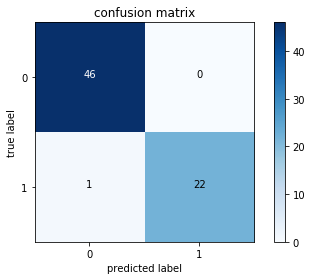

Accuracy rate = 0.99
Precision rate = 1.00
Recall rate = 0.96
F1 score = 0.98
the threshold is  [2 1 0]


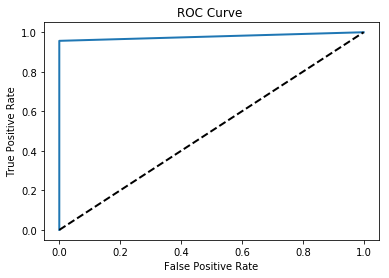

In [44]:
# now using the best parameters to log the regression model
logistic_reg = LogisticRegression( C=best_para['C'],penalty=best_para['penalty'],random_state=random_seed )
logistic_reg.fit( X_train,y_train )
y_pred = logistic_reg.predict( X_test )

plot_confusion_matrix( y_test,y_pred )
plt.show( )
print_matrix(y_test,y_pred)
plot_ROC(y_test,y_pred)
plt.show( )

In [31]:
y = df.diagnosis                          # M or B 
list = [  'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean',  'fractal_dimension_mean',
       'radius_se', 'texture_se',  'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se',  
       'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 
        'id', 'diagnosis']
       
x= df.drop(list,axis = 1 )
x.head()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

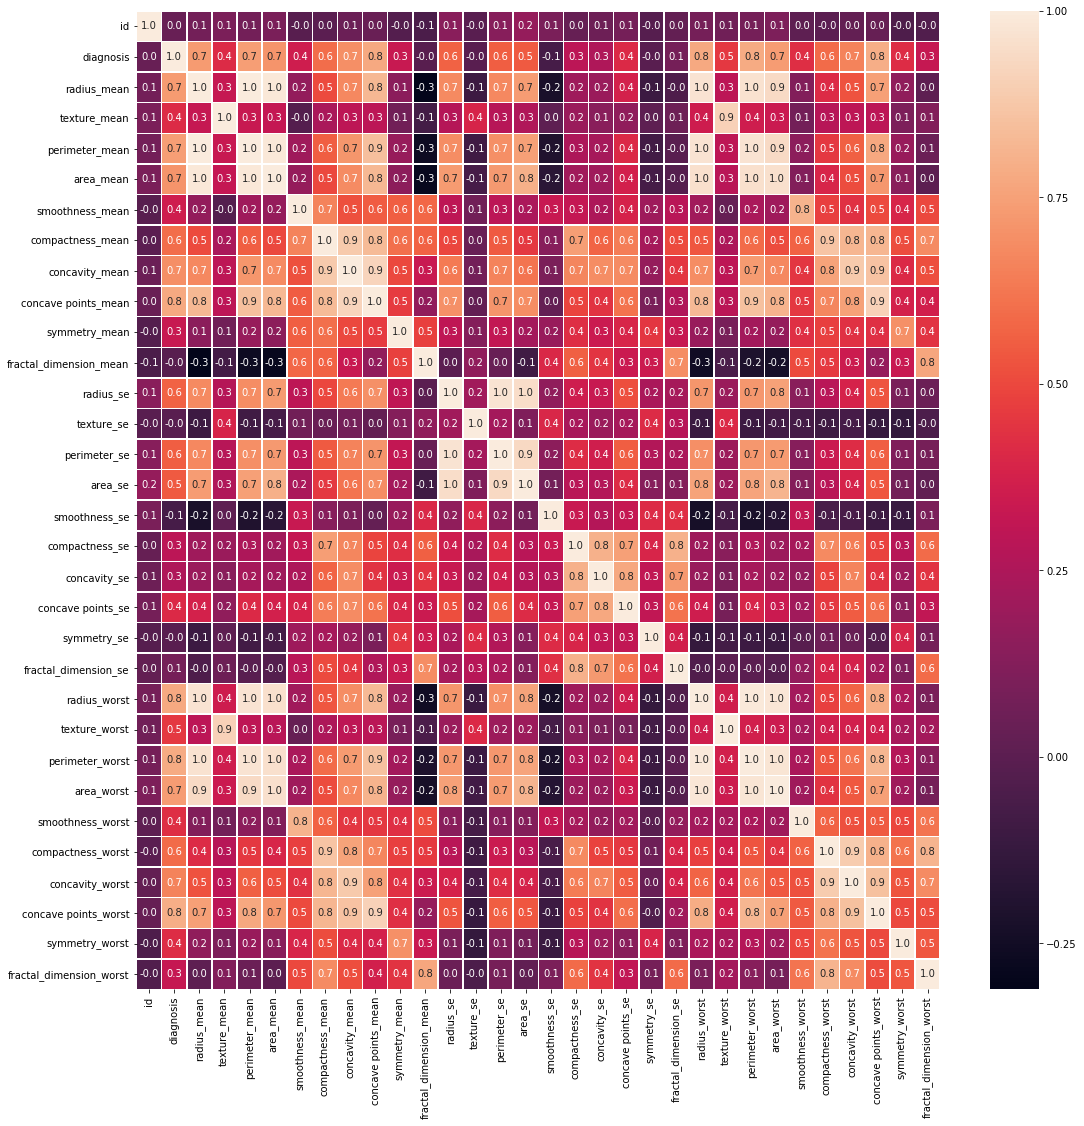

In [3]:
df['diagnosis'] = np.where(df.diagnosis == 'M', 1, 0)
y = df.diagnosis                          # M or B 
list = ['id','diagnosis']
x= df.drop(list,axis = 1 )
x.head()

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [4]:
x.columns
# Create correlation matrix
corr_matrix =x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
to_drop

['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'fractal_dimension_worst']

In [4]:
drop_list1 = ['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'fractal_dimension_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()


radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   symmetry_mean  fractal_dimension_mean  texture_se  smoothness_se  \
0         0.2419                 0.07871      0.9053       0.006399   
1         0.1812                 0.05667      0.7339       0.005225   
2         0.2069                 0.05999      0.7869       0.006150   
3         0.2597                 0.09744      1.1560       0.009110   
4         0.1809                 0.05883      0.7813       0.011490   

   symmetry_se  symmetry_worst  
0      0.03003          0.4601  
1      0.01389          0.2750  
2      0.02250          0.3613  
3      0.05963          0.6638  
4      0.01756          0.2364

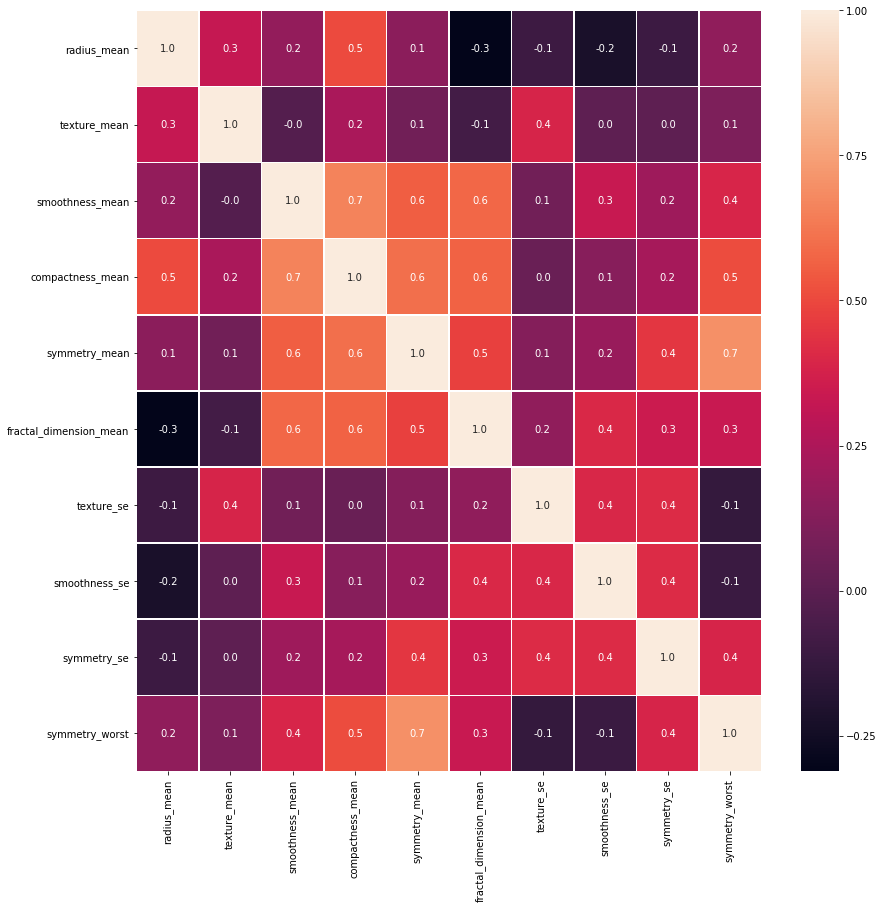

In [5]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [6]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

In [50]:

# Calcualte the Fisher Score (chi2) between each feature and target
fisher_score = chi2(x.fillna(0), y)
fisher_score

(array([3.57000e+02, 2.66105e+02, 9.38975e+01, 2.01110e+03, 5.39917e+04,
        1.49899e-01, 5.40308e+00, 1.97124e+01, 1.05440e+01, 2.57380e-01,
        7.43066e-05, 3.46752e+01, 9.79354e-03, 2.50572e+02, 8.75850e+03,
        3.26621e-03, 6.13785e-01, 1.04472e+00, 3.05232e-01, 8.03634e-05,
        6.37137e-03, 4.91689e+02, 1.74449e+02, 3.66504e+03, 1.12598e+05,
        3.97366e-01, 1.93149e+01, 3.95169e+01, 1.34854e+01, 1.29886e+00,
        2.31522e-01]),
 array([1.26716e-079, 8.01398e-060, 3.32292e-022, 0.00000e+000,
        0.00000e+000, 6.98632e-001, 2.01013e-002, 9.00176e-006,
        1.16564e-003, 6.11926e-001, 9.93122e-001, 3.89553e-009,
        9.21168e-001, 1.94877e-056, 0.00000e+000, 9.54425e-001,
        4.33366e-001, 3.06727e-001, 5.80621e-001, 9.92847e-001,
        9.36380e-001, 6.11325e-109, 7.89668e-040, 0.00000e+000,
        0.00000e+000, 5.28453e-001, 1.10837e-005, 3.25230e-010,
        2.40424e-004, 2.54421e-001, 6.30397e-001]))

In [49]:

p_values = pd.Series(fisher_score[1])
p_values.index = x.columns
p_values.sort_values(ascending=False)

fractal_dimension_mean      9.931222e-01
symmetry_se                 9.928474e-01
smoothness_se               9.544251e-01
fractal_dimension_se        9.363798e-01
texture_se                  9.211682e-01
smoothness_mean             6.986316e-01
fractal_dimension_worst     6.303973e-01
symmetry_mean               6.119260e-01
concave points_se           5.806211e-01
smoothness_worst            5.284529e-01
compactness_se              4.333661e-01
concavity_se                3.067268e-01
symmetry_worst              2.544213e-01
compactness_mean            2.010130e-02
concave points_mean         1.165636e-03
concave points_worst        2.404244e-04
compactness_worst           1.108368e-05
concavity_mean              9.001757e-06
radius_se                   3.895534e-09
concavity_worst             3.252301e-10
texture_mean                3.322922e-22
texture_worst               7.896683e-40
perimeter_se                1.948775e-56
radius_mean                 8.013976e-60
diagnosis       

In [16]:
df.head()

y = df.diagnosis                          # M or B 
list = ['id', 'diagnosis']
x_3= df.drop(list,axis = 1 )
x_3.head()
x_3.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

In [18]:
from collections import Counter
Counter(df["diagnosis"])

Counter({1: 212, 0: 357})

C:\Users\mkahs\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mkahs\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


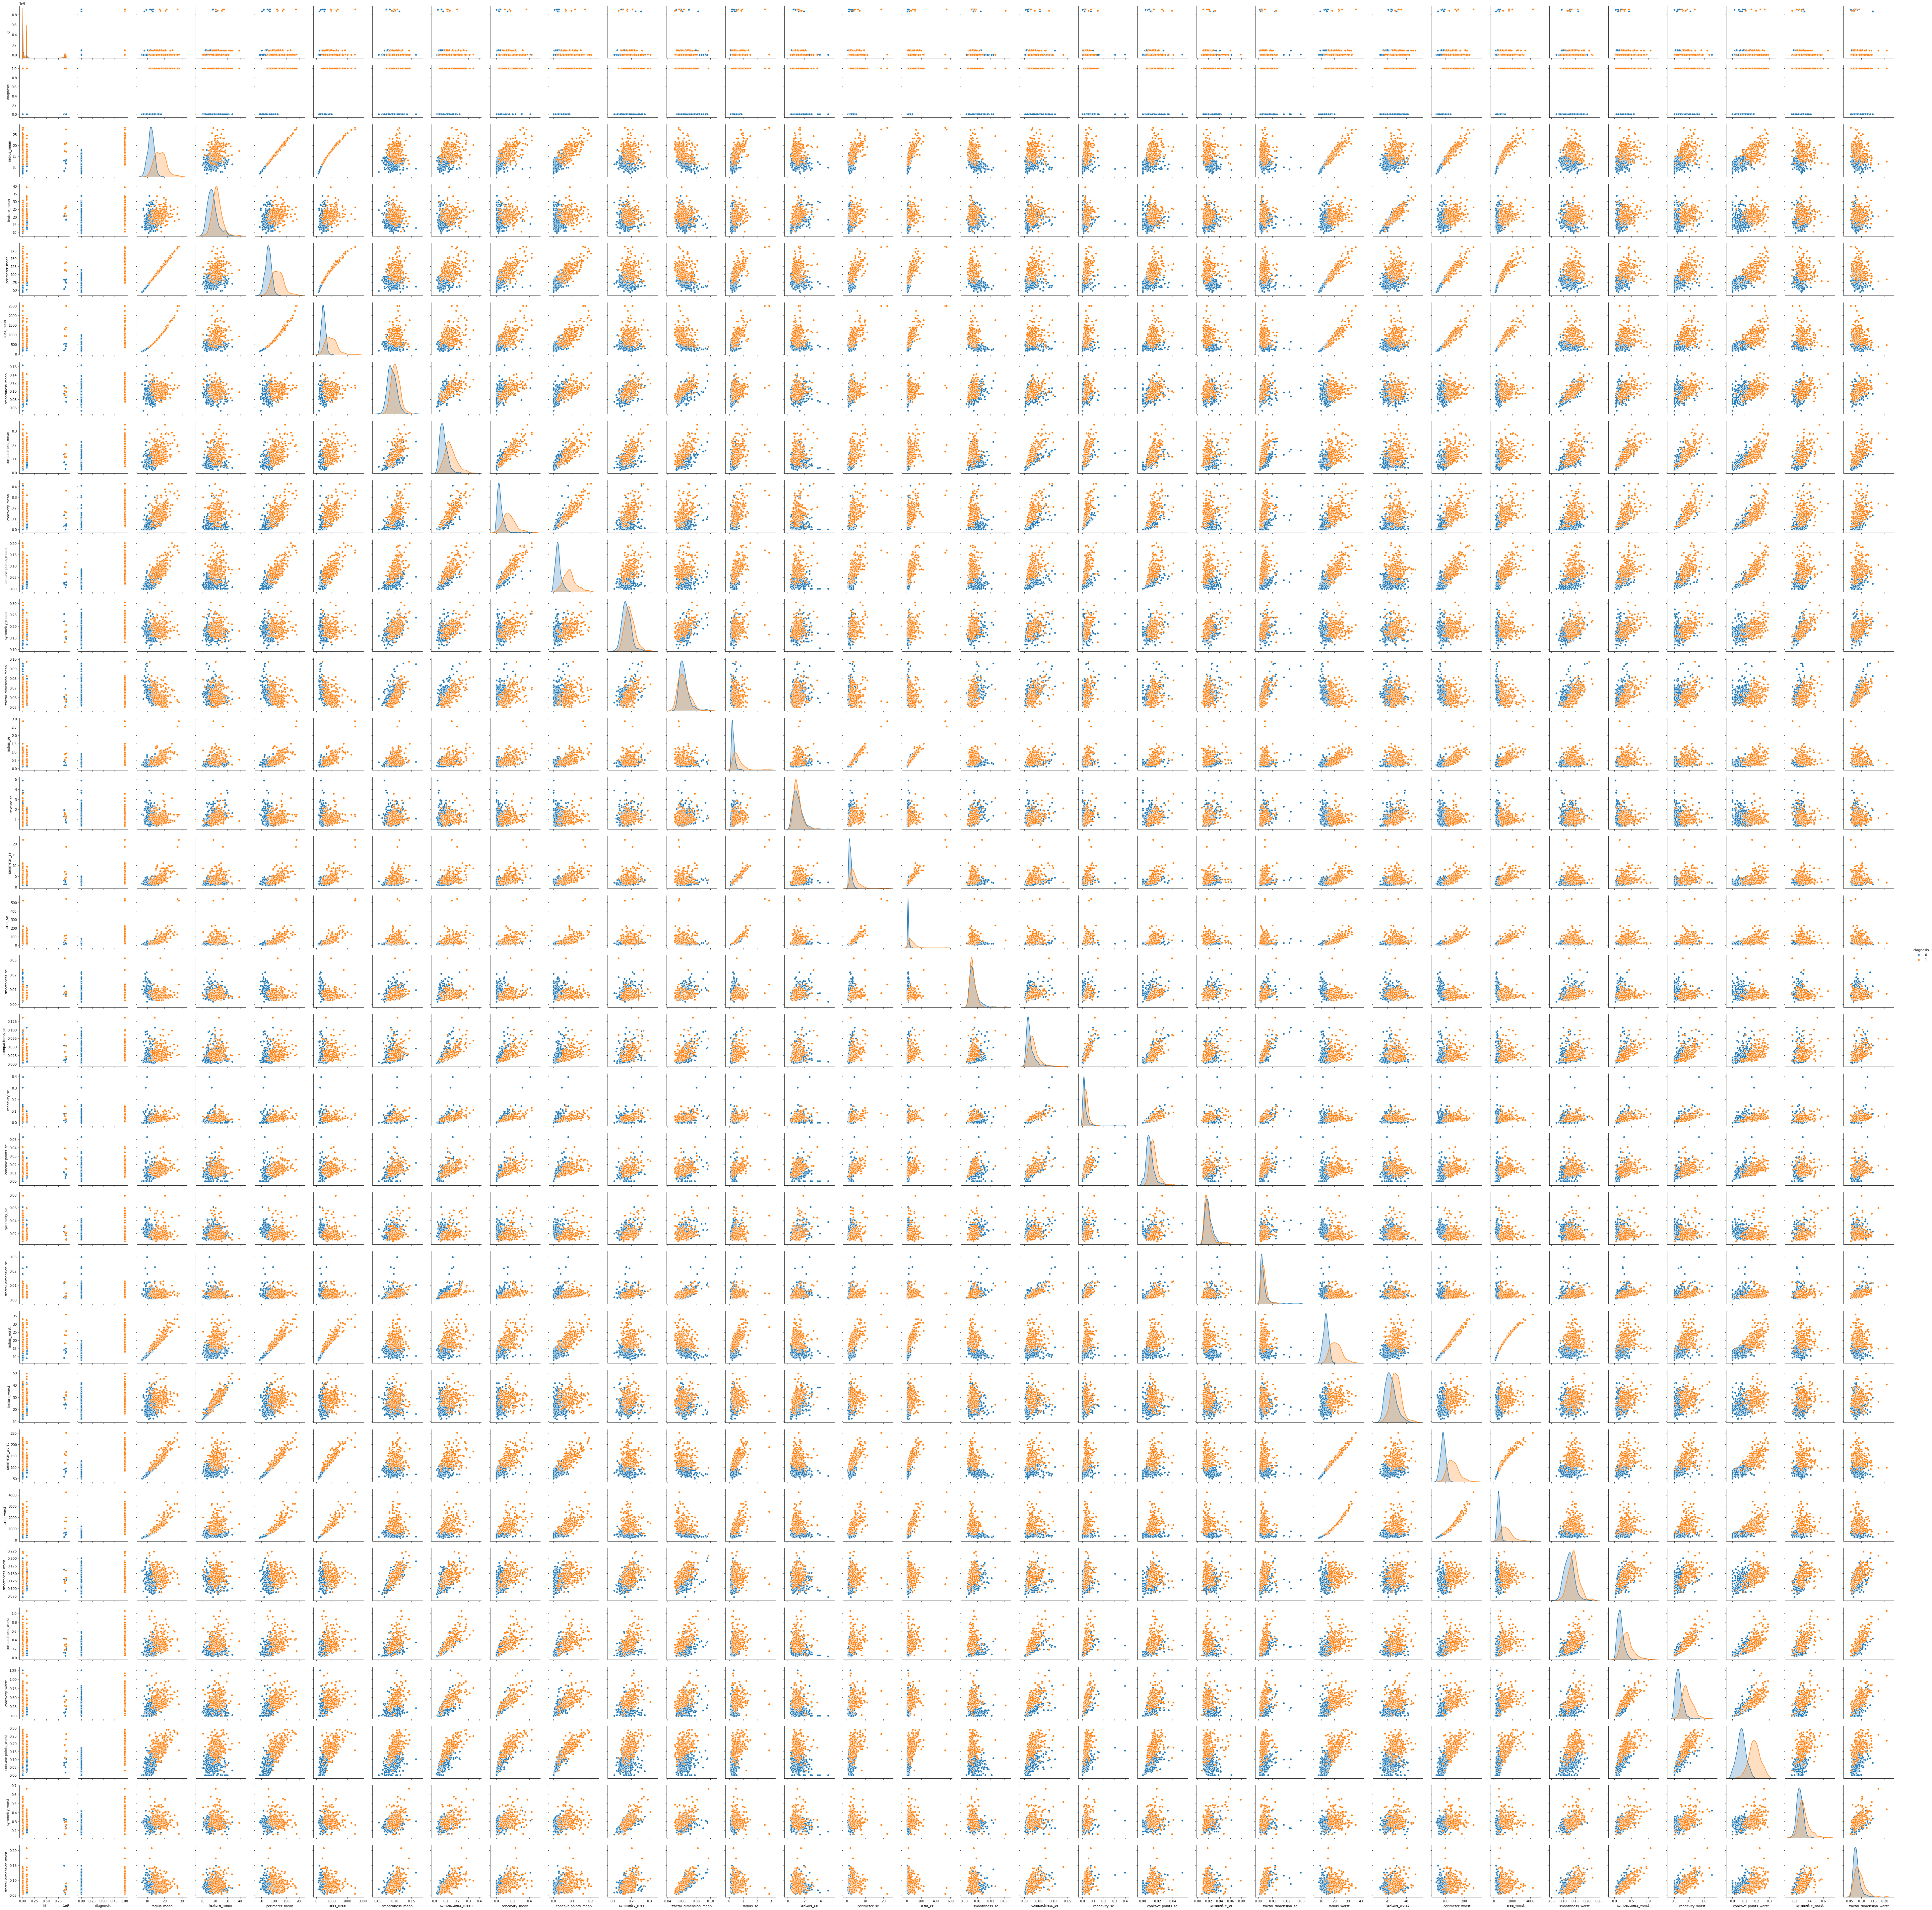

In [20]:
vis1 = sns.pairplot(df, hue="diagnosis")
#fig = vis1.get_fig()
vis1.savefig("lda.png")

In [22]:
np.set_printoptions(precision=5)

mean_vec = []
for i in df["diagnosis"].unique():
    mean_vec.append( np.array((df[df["diagnosis"]==i].mean()[:3]) ))
print(mean_vec)

[array([3.68181e+07, 1.00000e+00, 1.74628e+01]), array([2.65438e+07, 0.00000e+00, 1.21465e+01])]


In [24]:

SW = np.zeros((3,3))
for i in range(1,2): #2 is number of classes
    per_class_sc_mat = np.zeros((3,3))
    for j in range(df[df["diagnosis"]==i].shape[0]):
        row, mv = df.loc[j][:3].reshape(3,1), mean_vec[i].reshape(3,1)
        per_class_sc_mat += (row-mv).dot((row-mv).T)
    SW += per_class_sc_mat

AttributeError: 'Series' object has no attribute 'reshape'

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  

# 0. Load in the data and split the descriptive and the target feature
# df = pd.read_csv('data/Wine.txt',sep=',',names=['target','Alcohol','Malic_acid','Ash','Akcakinity','Magnesium','Total_pheonols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280','Proline'])
df= pd.read_excel("D:/Dataset/Wisconsin_breast_cancer.xlsx")

df['diagnosis'] = np.where(df.diagnosis == 'M', 1, 0)
Y = df.diagnosis                          # M or B 
list = ['id','diagnosis']
X= df.drop(list,axis = 1 )
# X.head()

# X = df.iloc[:,1:].copy()
# target = df['target'].copy()
# X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3,random_state=0) 
# 1. Instantiate the method and fit_transform the algotithm
# X = sc.fit_transform(X)
# LDA = LinearDiscriminantAnalysis(n_components=3) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
# data_projected = LDA.fit_transform(X,Y)

# print(data_projected.shape)
# print(type(data_projected))
# print(data_projected)

lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(X, Y)
drA = lda.transform(X)

print(drA.shape)


# lda = LinearDiscriminantAnalysis()
# k_fold = cross_validation.KFold(len(A), 3, shuffle=True)
# print('LDA Results: ')
# for (trn, tst) in k_fold:
#     lda.fit(A[trn], y[trn])
#     outVal = lda.score(A[tst], y[tst])
#     #Compute classification error
# print('Score: ' + str(outVal))



# PLot the transformed data
# markers = ['s','x','o']
# colors = ['r','g','b']
# fig = plt.figure(figsize=(10,10))
# ax0 = fig.add_subplot(111)
# for l,m,c in zip(np.unique(Y),markers,colors):
#     ax0.scatter(data_projected[:,0][Y==l],data_projected[:,1][Y==l],c=c,marker=m)
    

(569, 1)
